In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Akkju\AppData\Local\Temp\ipykernel_14320\804188518.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')


In [2]:
def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

In [3]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index = 'job_posted_month_no', columns='job_skills', aggfunc='size', fill_value= 0)
df_DA_pivot.sort_values(by='job_posted_month_no')
df_DA_pivot.loc['total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['total'].sort_values(ascending = False).index]
df_DA_pivot = df_DA_pivot.drop('total')

In [5]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Use month names for plotting

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

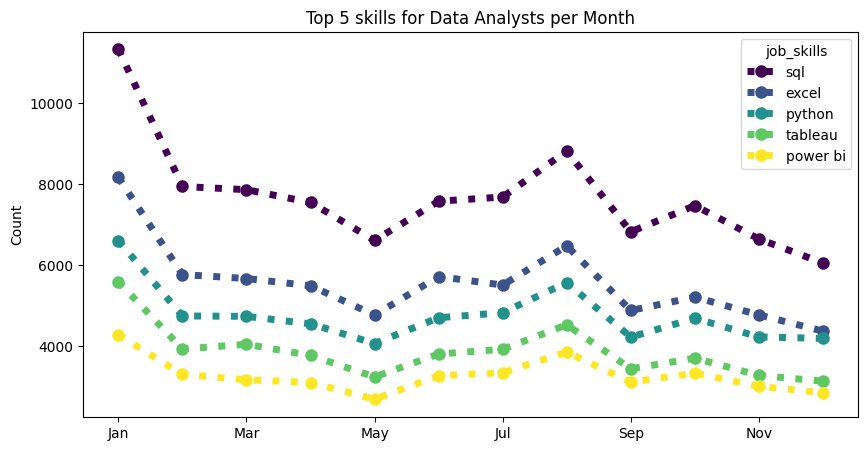

In [7]:
df_DA_pivot.iloc[:, 0:5].plot(
    kind='line',
    linewidth = 5,
    linestyle= ':',
    colormap='viridis', #plasma inferno magma
    marker ='o', # 1, 2, 3, x, *
    markersize = 8,
    figsize=(10,5)
)
plt.title('Top 5 skills for Data Analysts per Month')
plt.xlabel(' ')
plt.ylabel('Count')
plt.show()

In [27]:
df_exploded = df.explode('job_skills')

skills_stats = df_exploded.groupby('job_skills').agg(
    skills_count =('job_skills','count'),
    median_salary =('salary_year_avg', 'median')
)

scount = 10
skills_stats = skills_stats.sort_values(by='skills_count', ascending=False).head(scount)

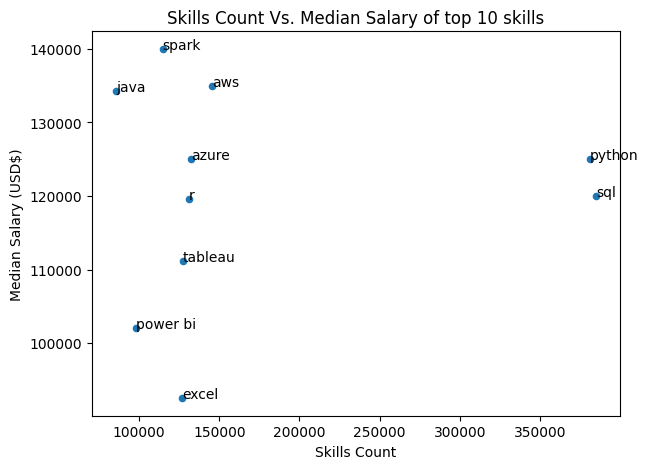

In [28]:
skills_stats.plot(kind='scatter',y='median_salary',x='skills_count')
plt.title('Skills Count Vs. Median Salary of top 10 skills')
plt.tight_layout()
plt.ylabel("Median Salary (USD$)")
plt.xlabel('Skills Count')

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skills_count'].iloc[i], skills_stats['median_salary'].iloc[i],txt)

plt.show()

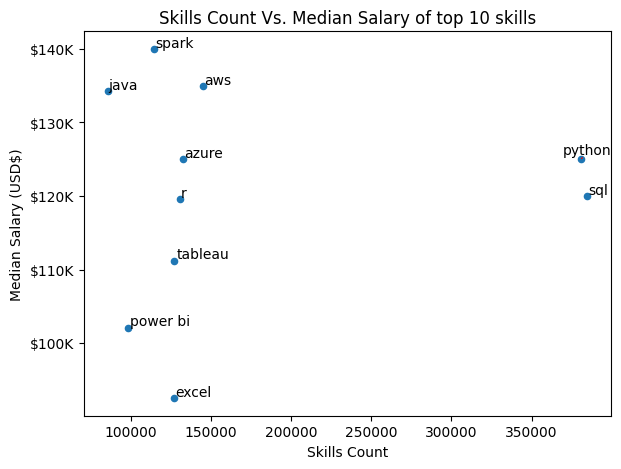

In [ ]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter',y='median_salary',x='skills_count')
plt.title('Skills Count Vs. Median Salary of top 10 skills')
plt.tight_layout()
plt.ylabel("Median Salary (USD$)")
plt.xlabel('Skills Count')

texts = [] #Created a list and appending as below to use adjust_text

for i, txt in enumerate(skills_stats.index): 
    texts.append(plt.text(skills_stats['skills_count'].iloc[i], skills_stats['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops = dict(arrowstyle="->", color ='r', lw=0.5))

ax = plt.gca() #access to the current axis gca = get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) #Yaxis formatting 100k,150k etc

plt.show()